In [1]:
import os
import nltk
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# load all the text files and store into text
all_files = os.listdir("Speech Data/")
text = []
for file in all_files:
    f = open("Speech Data/" + file, encoding='utf8')
    indv_text = f.read().split('\n\n')
    text.extend(indv_text)

In [3]:
# conversion of unicode symbols
new_text = ""
for i in text:
    x = i.replace('’', '\'')
    x = x.replace('“', '\"')
    x = x.replace('”', '\"')
    x = x.replace('—', "-")
    x = x.strip()
    new_text += x + " "

In [4]:
new_text

'THE PRESIDENT: Thank you very much, everyone. My administration will do everything possible to help those communities get back on their feet. We\'re speaking with the governors and representatives. FEMA is already on its way, and they got there-as soon as we heard the word, I said, "Get out there." So FEMA is there, and you know the great job that FEMA does. It\'s, really, something very special. So we just want to say: Warmest condolences, and we\'re with you all the way. It\'s a tough deal. That was a bad, bed level five. That was a bad group. That\'s as high as it gets. It was a bad grouping of tornadoes. Something that\'s something incredible, the power-the horrible, destructive power. America is continuing to make critical progress in our war against the virus. Over the weekend, the number of daily new infections remained flat nationwide. Flat. Hospitalizations are slowing in hotspots like New York, New Jersey, Michigan, and Louisiana. This is clear evidence that our aggressive s

In [5]:
# tokenisation
# identify distinct tokens and count distribution of lengths
tokens = set(nltk.word_tokenize(new_text))
tokens_len = []

for t in tokens:
    tokens_len.append(len(t))

counted_tokens = Counter(tokens_len)

In [6]:
tokens

{'steep',
 'writes',
 'extension',
 'Iain',
 'Arabian',
 'Human',
 'behalf',
 'Street',
 'requirement',
 'Graham',
 'little',
 'awe-inspiring',
 'perfectly',
 'deployed',
 'privacy',
 'erasure',
 'game',
 'Parkinson',
 'Japan',
 'Kerry',
 'agreement',
 '1.8',
 'only',
 'Medtronic',
 'robbery',
 'bought',
 'popular',
 'wrapped',
 'supplies-Mr.',
 'conformity',
 'baby',
 'system',
 'HIV/AIDS',
 'Strong',
 'interim',
 'balloting',
 'duplicate',
 'Analysis',
 'taverns',
 'about-then',
 'H1N1',
 'Andy',
 'mountains',
 'surviving',
 'likes',
 'prohibitions',
 'congressmen',
 'decision',
 'dream',
 'Following',
 'congratulations',
 'ministries',
 'expectation',
 'lawful',
 'toured',
 'top',
 'riots',
 'outcome',
 'mayhem',
 'silence',
 'left',
 'models',
 'instigated',
 'go',
 'Dealt',
 'self-isolating',
 'Philadelphia',
 'somewhere',
 'vibrant',
 "we're-a",
 'ramping',
 'bump',
 'gangs',
 'leading',
 'lure',
 'intervene',
 'ports',
 'personal',
 'Rhodes',
 'Tubman',
 'PARTICIPANT',
 'wars',


In [7]:
counted_tokens

Counter({5: 1151,
         8: 1263,
         4: 906,
         10: 768,
         7: 1424,
         12: 314,
         3: 439,
         11: 483,
         6: 1253,
         2: 158,
         9: 1023,
         16: 36,
         15: 64,
         13: 163,
         1: 41,
         14: 103,
         17: 28,
         18: 16,
         19: 16,
         21: 3,
         24: 1,
         25: 1,
         20: 6,
         23: 2,
         22: 1})

<module 'matplotlib.pyplot' from 'C:\\Users\\YingTing\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

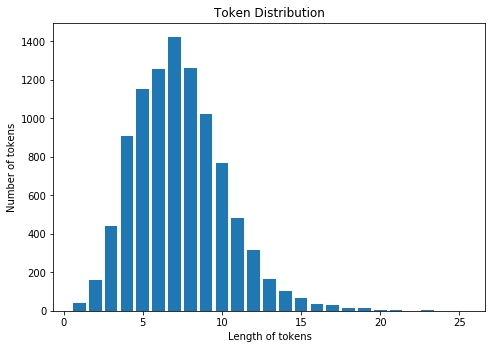

In [8]:
# plot distribution of number of tokens of each length against length of tokens
tokens_y = list(counted_tokens.values())
tokens_x = list(counted_tokens.keys())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tokens_x, tokens_y)
ax.set_ylabel('Number of tokens')
ax.set_xlabel('Length of tokens')
ax.set_title('Token Distribution')
plt

In [9]:
len(tokens)

9663

In [10]:
# stemming using Porter Stemmer
ps = PorterStemmer()
stems = []
for i in tokens:
    stem = ps.stem(i)
    stems.append(stem)

In [11]:
# identify distinct stems and count distribution of lengths
stems_len = []

for s in set(stems):
    stems_len.append(len(s))

counted_stems = Counter(stems_len)

In [12]:
len(set(stems))

6558

In [13]:
counted_stems

Counter({4: 865,
         10: 259,
         6: 1150,
         7: 965,
         2: 174,
         5: 1100,
         8: 681,
         9: 432,
         3: 384,
         12: 114,
         1: 41,
         19: 8,
         18: 9,
         11: 179,
         15: 38,
         14: 42,
         16: 25,
         13: 65,
         17: 21,
         20: 2,
         21: 1,
         23: 1,
         22: 2})

<module 'matplotlib.pyplot' from 'C:\\Users\\YingTing\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

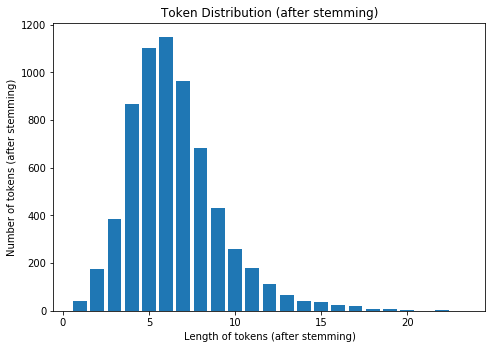

In [14]:
# plot distribution of number of stems of each length against length of stems
stems_y = list(counted_stems.values())
stems_x = list(counted_stems.keys())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(stems_x, stems_y)
ax.set_ylabel('Number of tokens (after stemming)')
ax.set_xlabel('Length of tokens (after stemming)')
ax.set_title('Token Distribution (after stemming)')
plt

In [15]:
# sentence segmentation
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(new_text)
sentences[-500:-1]

["And unless somebody does a very poor job as President, we're going to be first for a long way, because we've picked up trillions and trillions of dollars in value and worth of our country, and China has lost trillions and trillions of dollars, and millions of jobs, and their supply chain.",
 'And they want to make a deal.',
 "This year, America came to the United Nations stronger than we have ever been before: Since my election, the United States has not only brought our economy to a level that we have never seen, the most jobs that we've ever had - you know you've heard me say it many times - African American, Asian American, Hispanic American, the best unemployment numbers we've ever had.",
 'And the most and best employment numbers: 160 million - very close to that number - in jobs.',
 "We've never been anywhere close.",
 'Wages are up, and inequality is down.',
 "Something that people don't like writing about.",
 'But wages are up.',
 "I used to speak during the campaign, and I'd

In [16]:
# perform tokenisation of each sentence and count distribution of sentence length
sentences_len = []

for s in sentences:
    sentence_token = nltk.word_tokenize(s)
    sentences_len.append(len(sentence_token))

counted_sentences = Counter(sentences_len)

In [17]:
counted_sentences

Counter({10: 519,
         16: 311,
         9: 573,
         27: 152,
         15: 373,
         19: 267,
         6: 670,
         8: 666,
         13: 392,
         14: 381,
         2: 223,
         17: 309,
         22: 233,
         26: 120,
         12: 429,
         25: 147,
         5: 679,
         4: 639,
         21: 210,
         105: 2,
         77: 4,
         78: 2,
         24: 168,
         20: 247,
         45: 27,
         49: 15,
         23: 192,
         43: 29,
         3: 310,
         7: 623,
         36: 46,
         39: 36,
         28: 108,
         18: 292,
         46: 20,
         11: 458,
         31: 80,
         29: 119,
         41: 36,
         30: 107,
         37: 45,
         32: 74,
         48: 20,
         47: 17,
         42: 38,
         33: 76,
         61: 7,
         38: 35,
         83: 1,
         53: 10,
         40: 35,
         51: 13,
         34: 75,
         35: 61,
         75: 2,
         81: 2,
         56: 8,
         89: 1,
 

<module 'matplotlib.pyplot' from 'C:\\Users\\YingTing\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

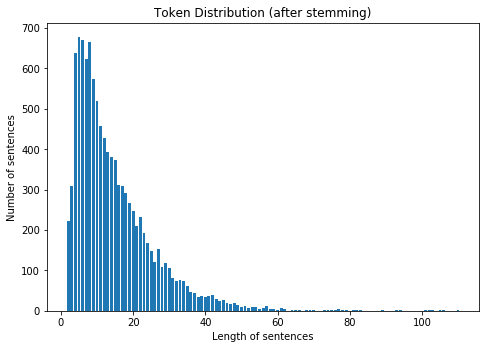

In [18]:
# plot distribution of number of sentences of each length against length of sentences
sentences_y = list(counted_sentences.values())
sentences_x = list(counted_sentences.keys())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sentences_x, sentences_y)
ax.set_ylabel('Number of sentences')
ax.set_xlabel('Length of sentences')
ax.set_title('Sentence Distribution')
plt

In [19]:
s1 = "And I think we're going to-boom-I think we're going to-I think it's going to go quickly."
s1_tokens = nltk.word_tokenize(s1)
nltk.pos_tag(s1_tokens)

[('And', 'CC'),
 ('I', 'PRP'),
 ('think', 'VBP'),
 ('we', 'PRP'),
 ("'re", 'VBP'),
 ('going', 'VBG'),
 ('to-boom-I', 'JJ'),
 ('think', 'NN'),
 ('we', 'PRP'),
 ("'re", 'VBP'),
 ('going', 'VBG'),
 ('to-I', 'JJ'),
 ('think', 'VBP'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('quickly', 'RB'),
 ('.', '.')]

In [20]:
s2 = "I met with Prime Minister Boris Johnson, at length, of the United Kingdom, continuing our discussions on a magnificent, new bilateral trade deal."
s2_tokens = nltk.word_tokenize(s2)
nltk.pos_tag(s2_tokens)

[('I', 'PRP'),
 ('met', 'VBD'),
 ('with', 'IN'),
 ('Prime', 'NNP'),
 ('Minister', 'NNP'),
 ('Boris', 'NNP'),
 ('Johnson', 'NNP'),
 (',', ','),
 ('at', 'IN'),
 ('length', 'NN'),
 (',', ','),
 ('of', 'IN'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('Kingdom', 'NNP'),
 (',', ','),
 ('continuing', 'VBG'),
 ('our', 'PRP$'),
 ('discussions', 'NNS'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('magnificent', 'NN'),
 (',', ','),
 ('new', 'JJ'),
 ('bilateral', 'JJ'),
 ('trade', 'NN'),
 ('deal', 'NN'),
 ('.', '.')]

In [21]:
s3 = "(Inaudible) in Argentina and Brazil are on their (inaudible) about the socialist and populist."
s3_tokens = nltk.word_tokenize(s3)
nltk.pos_tag(s3_tokens)

[('(', '('),
 ('Inaudible', 'JJ'),
 (')', ')'),
 ('in', 'IN'),
 ('Argentina', 'NNP'),
 ('and', 'CC'),
 ('Brazil', 'NNP'),
 ('are', 'VBP'),
 ('on', 'IN'),
 ('their', 'PRP$'),
 ('(', '('),
 ('inaudible', 'JJ'),
 (')', ')'),
 ('about', 'IN'),
 ('the', 'DT'),
 ('socialist', 'NN'),
 ('and', 'CC'),
 ('populist', 'NN'),
 ('.', '.')]